## 2.1.2 Analysis of the discovered community
In this notebook we analyze the community discovered with with the Leiden method and Demon methods.

<a id="top"></a>
### Table of Contents
1. [Data](#data)
2. [Leiden Communities](#leiden)
3. [Explore Communities ](#explore)

   

In [162]:
import warnings
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
import cdlib
from cdlib import algorithms
from cdlib import ensemble as en
from cdlib import evaluation as evaluation
from cdlib import viz
import matplotlib.pyplot as plt
import datetime
from cdlib import algorithms, readwrite
warnings.filterwarnings('ignore')

In [163]:
def mesure_graph(DG):
    print('The Network DG has:\n Number of Nodes = ',DG.number_of_nodes(),'\n Number of Edges = ',DG.number_of_edges(),'\n')
    print('Average degree of "edges, links" = ',sum(dict(DG.degree()).values())/float(len(DG)))
    print('Is a Directed Network ?',DG.is_directed())

<a id="data"></a>
### 1. Data:([to top](#top))

#### Top 100 subreddits

In [164]:
data_parents = pd.read_csv("scraping data/data/data_parents.csv",index_col=0,sep=";")
data_parents.head(10)

,Subreddit,Members,Type,Theme
0.0,politics,high,News,politics
1.0,interstingasfuck,high,Media share,melting pot
2.0,PublicFreakout,high,Media share,politics
3.0,nextfuckinglevel,high,Media share,melting pot
4.0,aww,very high,Media share,animals
5.0,funny,very high,Media share,memes
6.0,Unexpected,high,Media share,memes
7.0,worldnews,very high,News,politics
8.0,news,very high,News,news
9.0,Damnthatsinteresting,high,Media share,melting pot


#### Data Subreddit cleaned

In [165]:
df = pd.read_csv("scraping data/data/data_subreddit_cleaned.csv")
df.head()

,Unnamed: 0,from,to,id,title,score,date,comments,parent
0,0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


#### Data for Direct graph

In [166]:
df1 = pd.read_csv("scraping data/data/data_subreddit_direct.csv",index_col=0)

#delete the columns 
#columns2remove = ['date']
#df2.drop(columns2remove, inplace=True, axis=1)
df1.head()


,parent,to,interactions,crossposts,date,weights
0,nature,environment,1746.0,1,1.619228e+09,7.465655
1,nature,EcoNewsNetwork,154.0,13,1.615282e+09,5.043425
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


 #### Data for Undirect graph

In [167]:
dfg = pd.read_csv("scraping data/data/data_subreddit_Undirect.csv",index_col=0)

dfg1=dfg.copy()
#delete the columns 
#columns2remove = ['date']
#dfg.drop(columns2remove, inplace=True, axis=1)
dfg.head()

,parent,to,interactions,crossposts,date,weights
0,nature,environment,1965.0,3,1.609549e+09,7.583756
1,nature,EcoNewsNetwork,292.0,18,1.615282e+09,5.680173
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


#### Undirected Graph
The name of indirected Graph is "g"

In [168]:
g=[]
g = nx.from_pandas_edgelist(dfg, source='parent', target='to',
                                     edge_attr=['crossposts', 'weights'],
                                     create_using=nx.Graph())
mesure_graph(g)

The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  104284 

Average degree of "edges, links" =  8.403561787340344
Is a Directed Network ? False


<a id="leiden"></a>
### 2. Leiden communities([to top](#top))

#### Leiden communities
all the communities with discovery by Leiden method

Clustering algorithm name is Leiden 

Clustering parameters {'initial_membership': None, 'weights': 'crossposts'}
Identified Clustering with "Louvain", 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 

All the Leiden communities


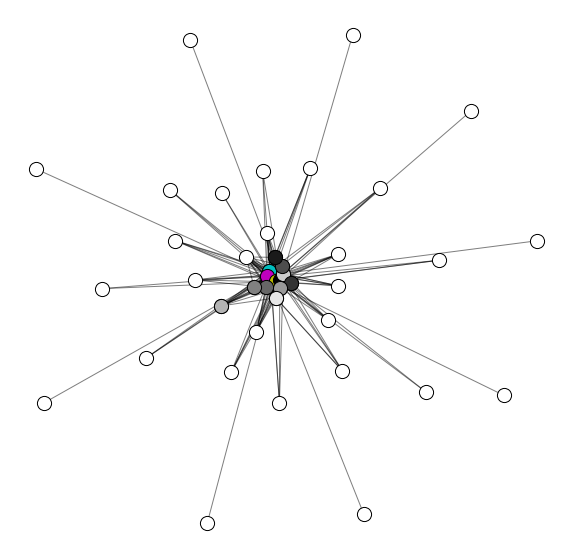

In [169]:
leiden_coms = algorithms.leiden(g,weights='crossposts')
leiden_clusters=leiden_coms.communities # Identified Clustering

print('Clustering algorithm name is',leiden_coms.method_name,'\n') 
print('Clustering parameters',leiden_coms.method_parameters)
print('Identified Clustering with "Louvain", \n')

leiden_clusters=leiden_coms.communities 

print('Wehter the clustering is overlapping or not = ',leiden_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',leiden_coms.node_coverage,'\n') 

leiden_comunity_js=louv_coms.to_json()
print('All the Leiden communities')
viz.plot_community_graph(g,leiden_coms, figsize=(10, 10))


Number of communities 45

 top 10 communities with Leiden 



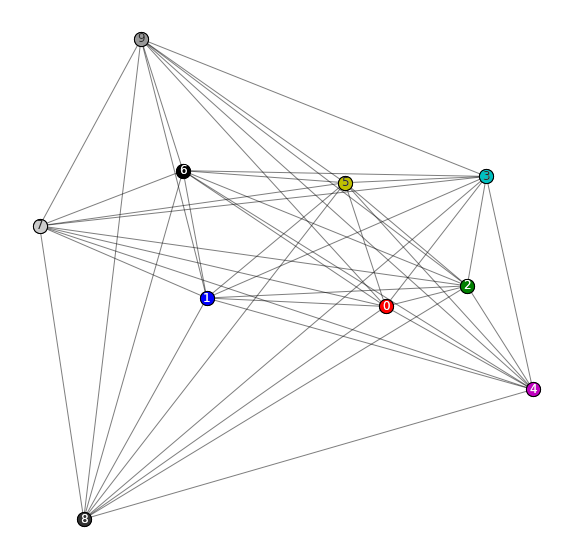

In [170]:
print('Number of communities',len(leiden_clusters))
print('\n top 10 communities with Leiden \n')
viz.plot_community_graph(g,leiden_coms, figsize=(10, 10),
                        plot_labels=True,top_k=10)



Internal edge density with Leiden


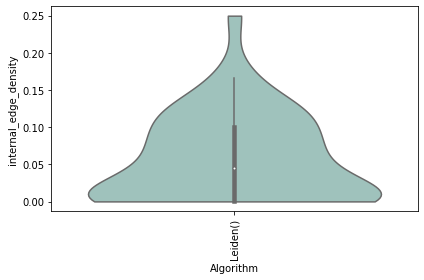

In [171]:
print('Internal edge density with Leiden')
viz.plot_com_stat(leiden_coms,evaluation.internal_edge_density)

Size Vs. Internal edge density

 Internal edge density Vs. Conductance 


 Size Vs. Conductance 



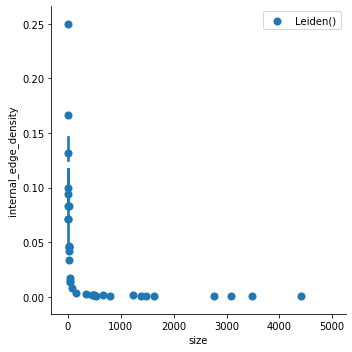

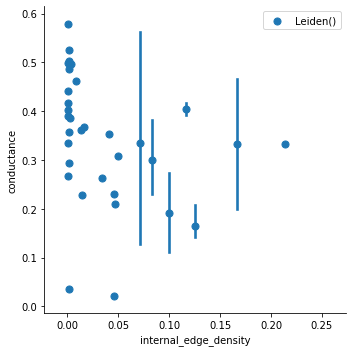

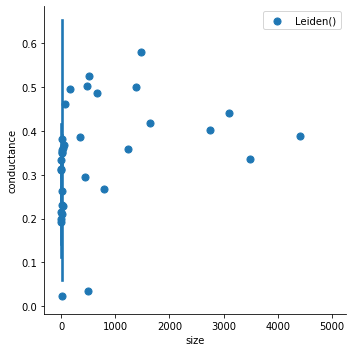

In [172]:
print('Size Vs. Internal edge density')
viz.plot_com_properties_relation(leiden_coms, evaluation.size, evaluation.internal_edge_density)
print('\n Internal edge density Vs. Conductance \n')
viz.plot_com_properties_relation(leiden_coms, evaluation.internal_edge_density,evaluation.conductance)
print('\n Size Vs. Conductance \n')
viz.plot_com_properties_relation(leiden_coms, evaluation.size, evaluation.conductance)

In [173]:
leiden_degree=leiden_coms.average_internal_degree()
print('Internal degree:\n', leiden_degree)
print('\n Conductance\n',evaluation.conductance(g,louv_coms))

leiden_in_degree=leiden_coms.average_internal_degree(summary=False)
print('\n Average Internal grade comunities with Leiden: \n\n',leiden_in_degree)

leiden_erd_mod=evaluation.erdos_renyi_modularity(g,leiden_coms)
print('\n Erdos_renyi_modularity:\n\n',leiden_erd_mod)
print('\n Newman girvan modularity:\n',evaluation.newman_girvan_modularity(g,leiden_coms))
print('\n Maximum fraction of edges of a node of a community that point outside the community itself.\n',evaluation.max_odf(g,leiden_coms,summary=False))
sz = evaluation.size(g,leiden_coms)
print('\n size of nodes for comunity \n',sz)
print('\n Fraction of community nodes that belong to a triad.\n',evaluation.triangle_participation_ratio(g,leiden_coms))

Internal degree:
 FitnessResult(min=1.0, max=8.050365556458164, score=2.7995489814761436, std=1.5108851497944107)

 Conductance
 FitnessResult(min=0.022222222222222223, max=0.7516339869281046, score=0.34227145923471936, std=0.16235217267665167)

 Average Internal grade comunities with Leiden: 

 [5.3996, 5.7117663268117935, 5.462440570522979, 4.142958748221906, 5.46037296037296, 3.8475935828877006, 5.6587813620071685, 8.050365556458164, 3.382388419782871, 3.8755426917510856, 2.450381679389313, 2.4448979591836735, 3.137577002053388, 2.6244541484716155, 3.285285285285285, 2.4516129032258065, 2.4935064935064934, 3.1666666666666665, 2.0526315789473686, 2.0555555555555554, 2.75, 1.8666666666666667, 2.4285714285714284, 4.0, 1.8333333333333333, 1.8181818181818181, 1.8, 4.2, 2.0, 2.0, 1.7142857142857142, 1.7142857142857142, 2.3333333333333335, 1.6666666666666667, 1.6666666666666667, 1.6, 1.6, 1.5, 1.5, 1.5, 1.5, 2.0, 1.5, 1.3333333333333333, 1.0]

 Erdos_renyi_modularity:

 FitnessResult(min=N

<a id="explore"></a>
### 3 Explore Communities([to top](#top))

In [270]:
num_com=[]
size_com=[]

size=len(leiden_clusters)
density=evaluation.internal_edge_density(g,leiden_coms,summary=False)
degree=evaluation.average_internal_degree(g,leiden_coms,summary=False)
conduct=evaluation.conductance(g,leiden_coms,summary=False)


for i in range(0,size):
    num_com.append(i+1)
    size_com.append(len(leiden_clusters[i]))
         
# intialise data of lists.
data = {'community':num_com,
        'size':size_com,'density':density,
        'degree':degree,
        'conductance':conduct,
       }                  
  # Create DataFrame
com = pd.DataFrame(data)
com.head()

,community,size,density,degree,conductance
0,1,5000,0.000270,5.399600,0.389199
1,2,3629,0.000394,5.711766,0.335087
2,3,3155,0.000433,5.462441,0.441922
3,4,2812,0.000368,4.142959,0.402595
4,5,1716,0.000796,5.460373,0.416890


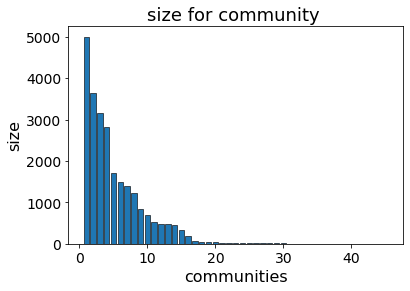

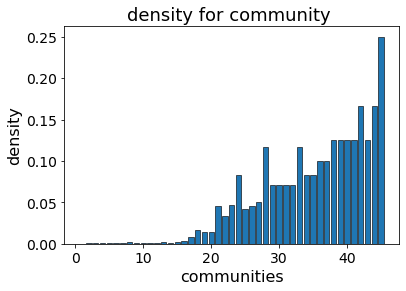

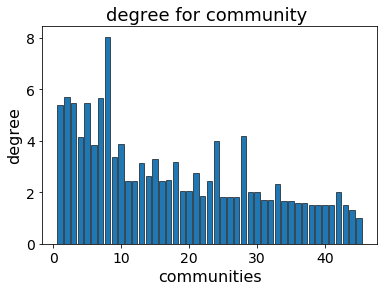

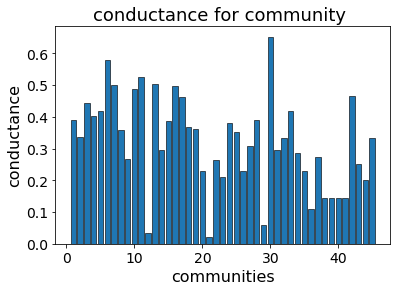

In [314]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
for i in range(1,5):
   
    name=[]
    name=com.columns[i]
    plt.title(name +' for community ',fontsize=18)
    
    plt.bar(com['community'],com[name], align='center', alpha=1, edgecolor='black', linewidth=0.6)
    plt.ylabel(com.columns[i], fontsize=16)
    plt.xlabel('communities',fontsize=16);
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.show()
   

In [250]:
for i in range(len(leiden_clusters)+1):
    
     for j in range(len(dfg)+1):
            if leiden_clusters[i]
            

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [245]:
data = {'community':[for _ in range(1,len(leiden_clusters),1)],
        'size':[evaluation.erdos_renyi_modularity(g,leiden_coms,summary=False)] }
data
# Create DataFrame


SyntaxError: invalid syntax (<ipython-input-245-68d017d83a15>, line 1)

In [237]:
numb=[range(1,len(leiden_clusters),1)
data_com["community"]=numb

SyntaxError: invalid syntax (<ipython-input-237-0d69c5ed264e>, line 2)

In [196]:
print(evaluation.erdos_renyi_modularity(g,leiden_coms,summary=True))

FitnessResult(min=None, max=None, score=0.4795815186831117, std=None)


### Analysis of the first top 10 communities

In [189]:
i=0
com=[]
leiden_clusters[i]
print('\033[1m' + '\n The Community ',i+1, '\033[0m \n') 
com=leiden_clusters[i]



 The Community  1  



In [191]:
len(com)

5000

In [187]:
top10=[]

for parent in range(len(data_parents)):
    for c in range(len(com)):
    top10.append

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
